## Image preperation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

DATADIR = './Scorecard Images/'
CATEGORIES = ['0', '1']
IMG_SIZE = 50

#------------------------------------------------------------------------------#
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array, cmap = 'gray')
#         plt.show()
#         break
#     break

# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap = 'gray')
# plt.show()

In [2]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            if img != '.DS_Store':
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])

In [3]:
create_training_data()
random.shuffle(training_data)

In [4]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1, 1)

In [5]:
#import pickle
#pickle_out = open('X.pickle', 'wb')
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open('y.pickle', 'wb')
#pickle.dump(y, pickle_out)
#pickle_out.close()

print("The data set contains " + str(X.shape[0]) + ' pictures')

The data set contains 4005 pictures


## Model creation

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [7]:
#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)
X = X / 255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1656047143
Epoch 1/10


2022-06-24 00:05:43.389886: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


88/88 [==============================] - 4s 44ms/step - loss: 0.3495 - accuracy: 0.8812 - val_loss: 0.2349 - val_accuracy: 0.9226
Epoch 2/10
88/88 [==============================] - 4s 43ms/step - loss: 0.1951 - accuracy: 0.9344 - val_loss: 0.1524 - val_accuracy: 0.9451
Epoch 3/10
88/88 [==============================] - 5s 57ms/step - loss: 0.1443 - accuracy: 0.9497 - val_loss: 0.1462 - val_accuracy: 0.9517
Epoch 4/10
88/88 [==============================] - 6s 65ms/step - loss: 0.1278 - accuracy: 0.9554 - val_loss: 0.1249 - val_accuracy: 0.9534
Epoch 5/10
88/88 [==============================] - 6s 66ms/step - loss: 0.1128 - accuracy: 0.9611 - val_loss: 0.0973 - val_accuracy: 0.9634
Epoch 6/10
88/88 [==============================] - 6s 70ms/step - loss: 0.0835 - accuracy: 0.9697 - val_loss: 0.0951 - val_accuracy: 0.9609
Epoch 7/10
88/88 [==============================] - 6s 69ms/step - loss: 0.0686 - accuracy: 0.9761 - val_loss: 0.0805 - val_accuracy: 0.9659
Epoch 8/10
88/88 [======

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


In [8]:
import cv2
import tensorflow as tf

def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [9]:
model = tf.keras.models.load_model("64x3-CNN.model")

## Test Model

1/1 [==============================] - 0s 14ms/step


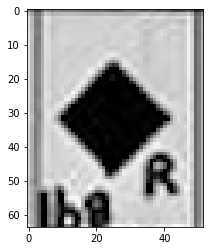

1/1 [==============================] - 0s 14ms/step


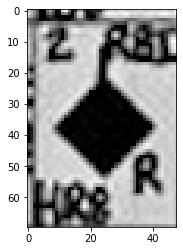

1/1 [==============================] - 0s 13ms/step
2 runs were scored!


In [10]:
dir_list = os.listdir('./test_cnn/') 
total_runs = 0
for img in dir_list:
    if img != '.DS_Store':
        ans = model.predict([prepare('./test_cnn/' + img)])
        if ans == 1:
            img_array = cv2.imread('./test_cnn/' + img, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap = 'gray')
            plt.show()
            total_runs += 1
print(total_runs, 'runs were scored!')